Dados

https://www.kaggle.com/datasets/shantanugarg274/sales-dataset

In [1]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
!python.exe -m pip install --upgrade pip

  Using cached pip-25.0.1-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-25.0.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.3.1
    Uninstalling pip-24.3.1:
      Successfully uninstalled pip-24.3.1


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv(r'C:\Users\Sandra\TE2D6_Python_IF\IF\bases\Sales Dataset.csv')

In [5]:
df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12


In [6]:
df.tail()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
1189,B-26370,8825,3594,15,Furniture,Tables,Debit Card,2024-07-31,Megan Mclean,New York,New York City,2024-07
1190,B-26298,2082,642,8,Electronics,Phones,EMI,2020-06-02,Caitlin Hunt,New York,Rochester,2020-06
1191,B-26298,2082,642,8,Electronics,Phones,EMI,2022-12-15,Jenna Holland,Texas,Austin,2022-12
1192,B-26298,2082,642,8,Electronics,Phones,EMI,2020-08-07,Stephanie Oconnell,New York,Buffalo,2020-08
1193,B-25068,914,163,13,Office Supplies,Markers,UPI,2024-10-26,Andrea Hill,Illinois,Chicago,2024-10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1194 non-null   object
 1   Amount        1194 non-null   int64 
 2   Profit        1194 non-null   int64 
 3   Quantity      1194 non-null   int64 
 4   Category      1194 non-null   object
 5   Sub-Category  1194 non-null   object
 6   PaymentMode   1194 non-null   object
 7   Order Date    1194 non-null   object
 8   CustomerName  1194 non-null   object
 9   State         1194 non-null   object
 10  City          1194 non-null   object
 11  Year-Month    1194 non-null   object
dtypes: int64(3), object(9)
memory usage: 112.1+ KB


In [8]:
df.shape

(1194, 12)

In [9]:
df.isnull()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1189,False,False,False,False,False,False,False,False,False,False,False,False
1190,False,False,False,False,False,False,False,False,False,False,False,False
1191,False,False,False,False,False,False,False,False,False,False,False,False
1192,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
Order Date      0
CustomerName    0
State           0
City            0
Year-Month      0
dtype: int64

<Axes: >

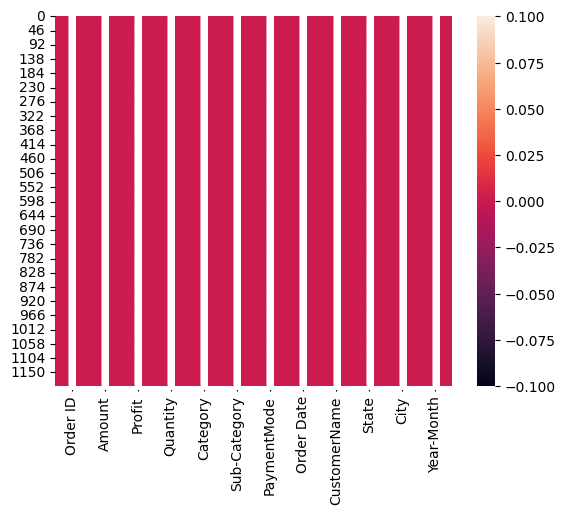

In [19]:
sns.heatmap(df.isnull(), annot=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.columns  

Index(['Order ID', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category',
       'PaymentMode', 'Order Date', 'CustomerName', 'State', 'City',
       'Year-Month'],
      dtype='object')

In [21]:
df.nunique()

Order ID        547
Amount          773
Profit          707
Quantity         20
Category          3
Sub-Category     12
PaymentMode       5
Order Date      648
CustomerName    802
State             6
City             18
Year-Month       61
dtype: int64

In [22]:
df.describe()

,Amount,Profit,Quantity
count,1194.000000,1194.000000,1194.000000
mean,5178.089615,1348.992462,10.674204
std,2804.921955,1117.992573,5.777102
min,508.000000,50.000000,1.000000
25%,2799.000000,410.000000,6.000000
50%,5152.000000,1014.000000,11.000000
75%,7626.000000,2035.000000,16.000000
max,9992.000000,4930.000000,20.000000


<Axes: >

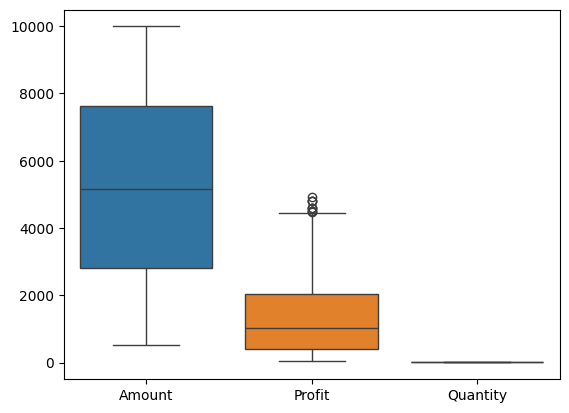

In [28]:
sns.boxplot(df)

In [26]:
# Intervalo Interquartil
Q1, Q3 = np.percentile(df['Profit'], [25, 75])
IRQ = Q3- Q1
limite_inferior = Q1 - (1.5 * IRQ)
limite_superior = Q3 + (1.5 * IRQ)
df_limpo = df[(df['Profit']>=limite_inferior)&(df['Profit']<=limite_superior)]

<Axes: >

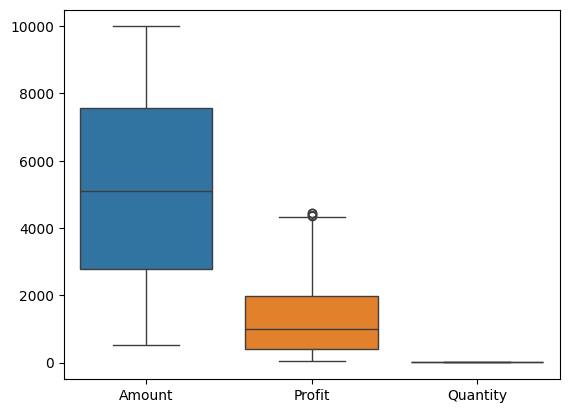

In [29]:
sns.boxplot(df_limpo)

In [30]:
df_limpo.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12


<Axes: >

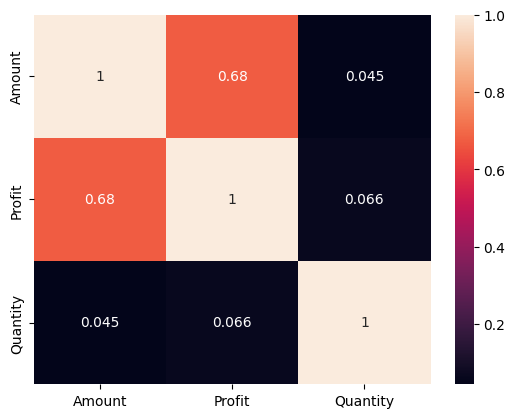

In [33]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

<Axes: xlabel='Year-Month', ylabel='Amount'>

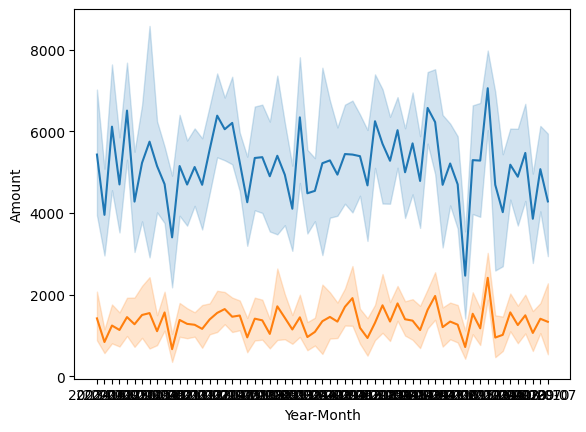

In [14]:
sns.lineplot(data=df, x='Year-Month',y='Amount')
sns.lineplot(data=df, x='Year-Month', y='Profit')

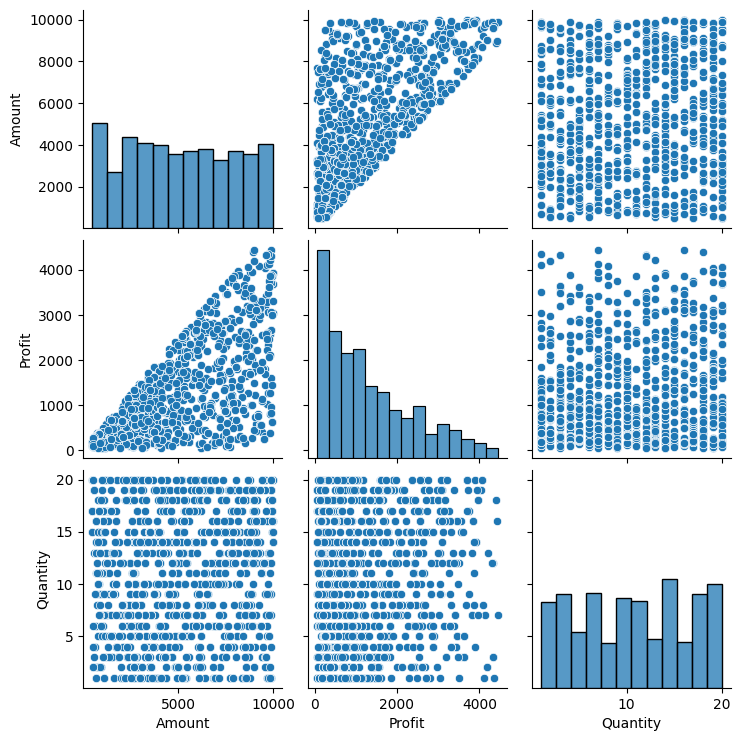

In [35]:
sns.pairplot(df_limpo)

<Axes: xlabel='Category'>

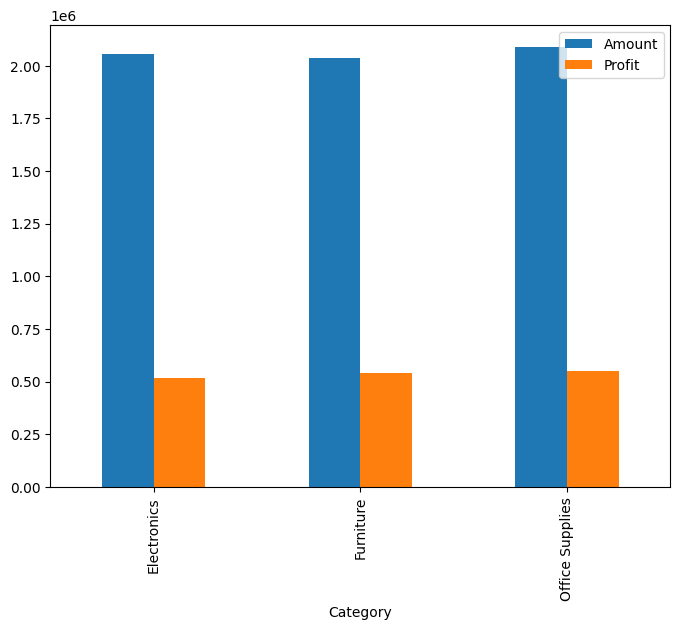

In [36]:
df.groupby('Category')[['Amount', 'Profit']].sum().plot(kind='bar', figsize=(8,6))

<Axes: ylabel='Sub-Category'>

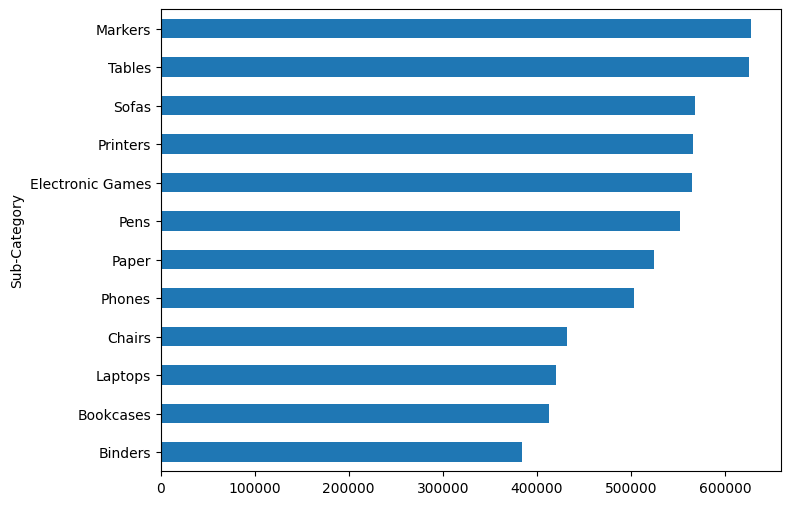

In [37]:
df.groupby('Sub-Category')['Amount'].sum().sort_values().plot(kind='barh', figsize=(8,6))

<Axes: xlabel='Quantity', ylabel='Count'>

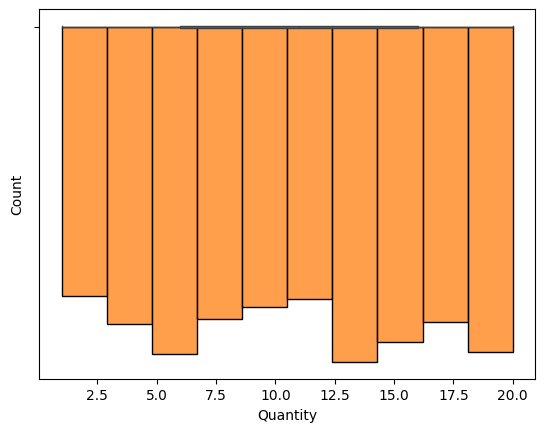

In [38]:
sns.boxplot(data=df, x='Quantity')
sns.histplot(df['Quantity'], bins=10)

<Axes: xlabel='Amount', ylabel='Count'>

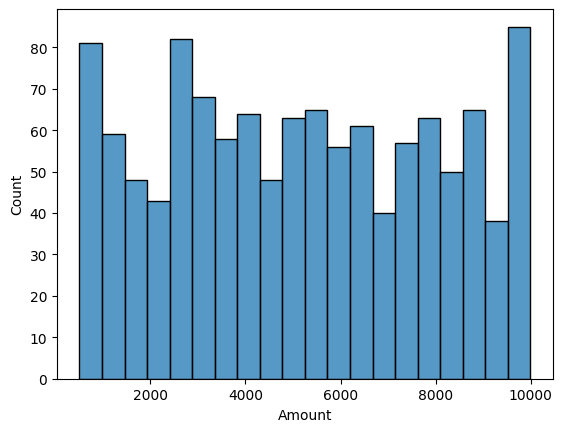

In [39]:
sns.histplot(df['Amount'], bins=20)

<Axes: ylabel='State'>

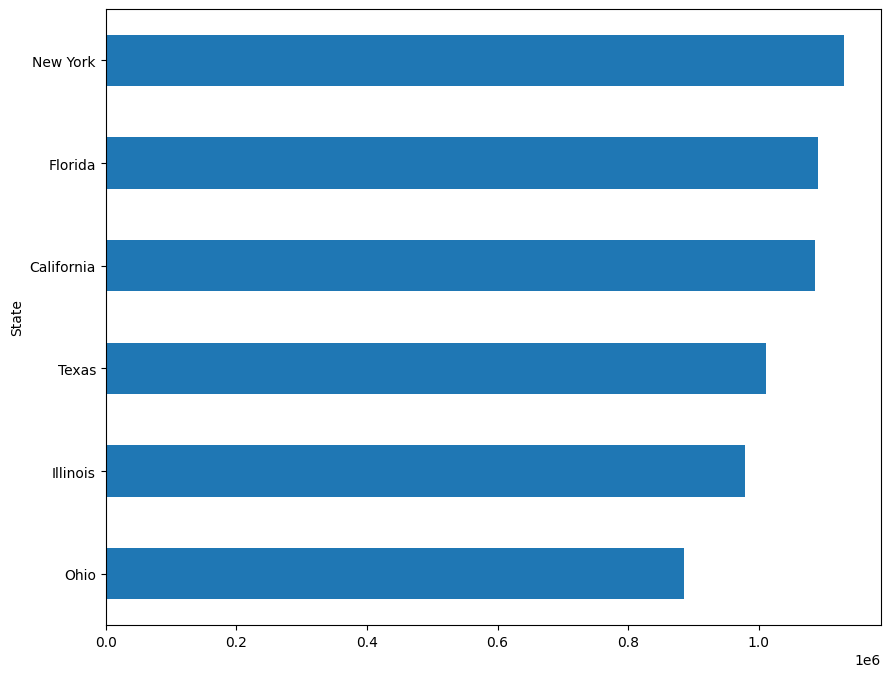

In [40]:
df.groupby('State')['Amount'].sum().sort_values().plot(kind='barh', figsize=(10,8))

Text(0.5, 0, 'Cidade')

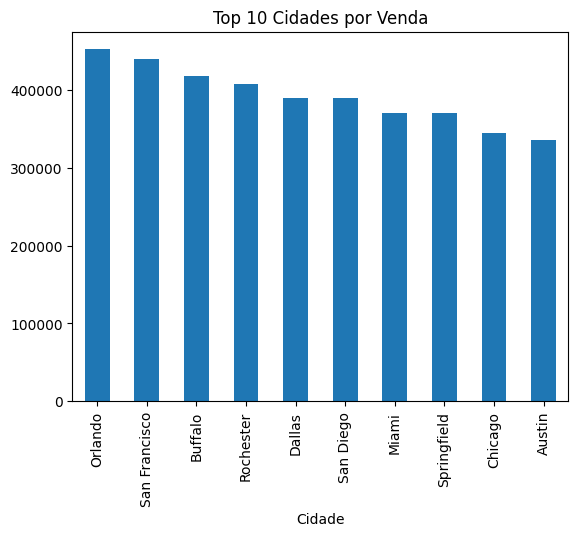

In [44]:
top_cidade = df.groupby('City')['Amount'].sum().nlargest(10)
ax = top_cidade.plot(kind='bar', title='Top 10 Cidades por Venda')
ax.set_xlabel('Cidade')

<Axes: xlabel='PaymentMode', ylabel='count'>

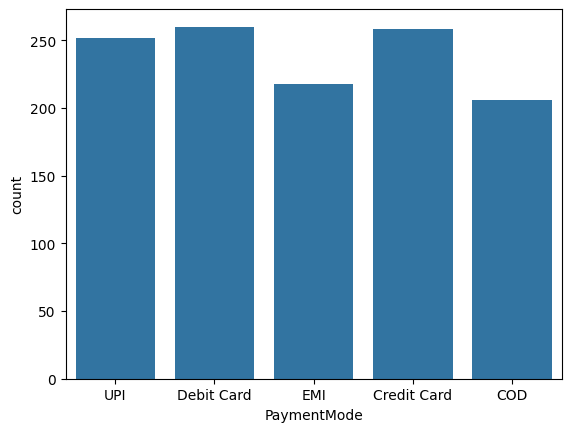

In [45]:
sns.countplot(data=df, x='PaymentMode')

Text(0, 0.5, 'Nome dos Clientes')

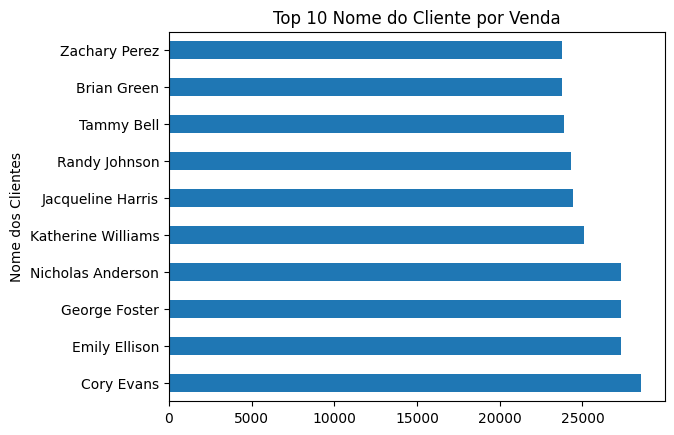

In [47]:
top_nome = df.groupby('CustomerName')['Amount'].sum().nlargest(10)
ax = top_nome.plot(kind='barh', title='Top 10 Nome do Cliente por Venda')
ax.set_ylabel('Nome dos Clientes')

<Axes: xlabel='Amount', ylabel='Profit'>

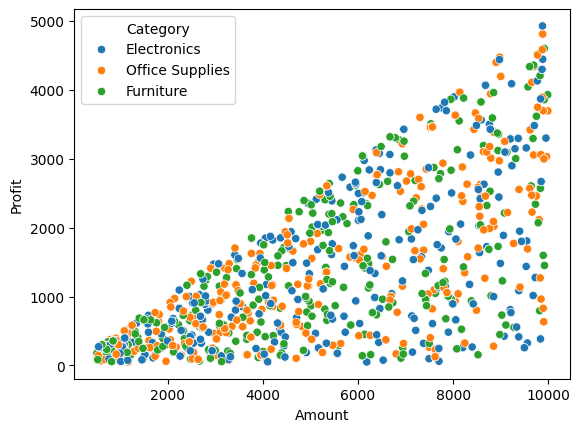

In [48]:
sns.scatterplot(data=df, x='Amount', y='Profit', hue='Category')

<Axes: xlabel='Year-Month'>

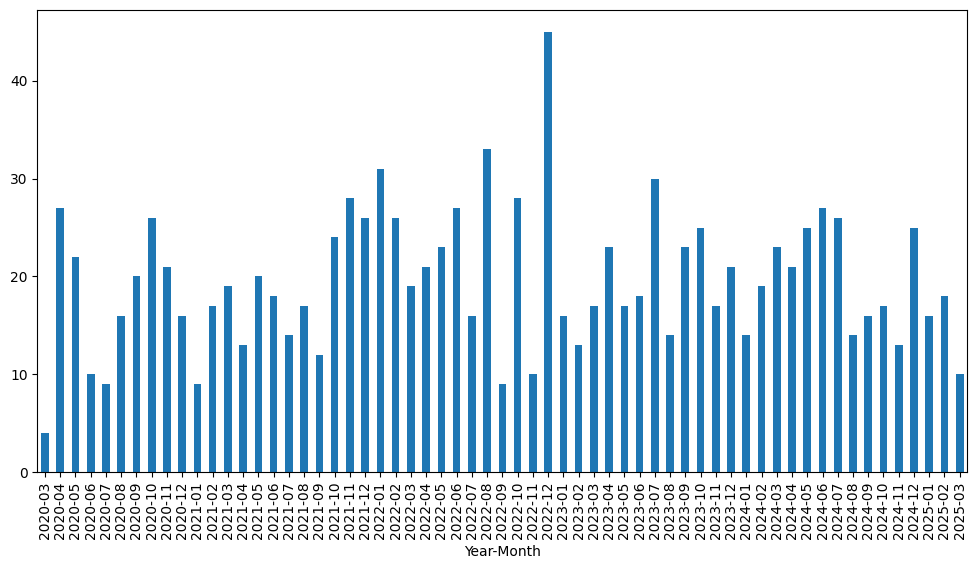

In [49]:
df['Order Count'] = 1
df.groupby('Year-Month')['Order Count'].count().plot(kind='bar', figsize=(12,6))

<Axes: >

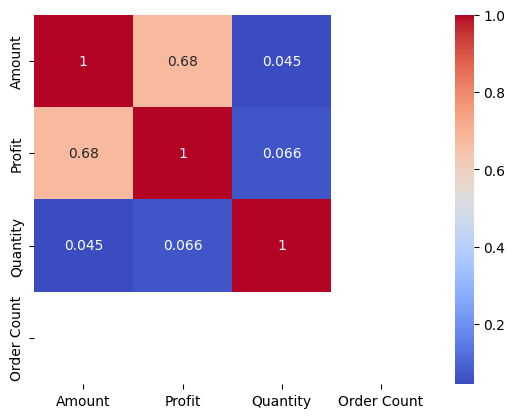

In [52]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

Predictive modeling

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [55]:
df.drop(['Order ID', 'Order Date', 'CustomerName', 'Year-Month'], axis=1, inplace = True)

In [56]:
df.dropna(inplace=True)

In [57]:
le = LabelEncoder()
for col in ['Sub-Category', 'PaymentMode','State', 'City']:
    df[col] = le.fit_transform(df[col])

In [58]:
X = df.drop('Category', axis=1)
y = le.fit_transform(df['Category'])

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [79]:
models = {
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(max_iter=8000)),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": make_pipeline(StandardScaler(),SVC()),
    "KNM": make_pipeline(StandardScaler(),KNeighborsClassifier())
}


🧪 Model: Logistic Regression
✅ Accuracy: 42.62%

🧪 Model: Random Forest
✅ Accuracy: 98.33%

🧪 Model: Decision Tree
✅ Accuracy: 100.00%

🧪 Model: Naive Bayes
✅ Accuracy: 46.24%

🧪 Model: SVM
✅ Accuracy: 66.85%

🧪 Model: KNM
✅ Accuracy: 58.77%


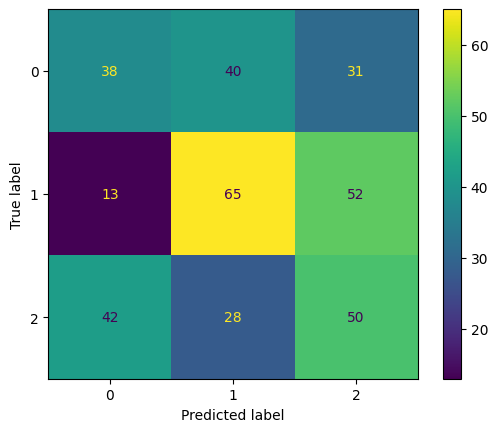

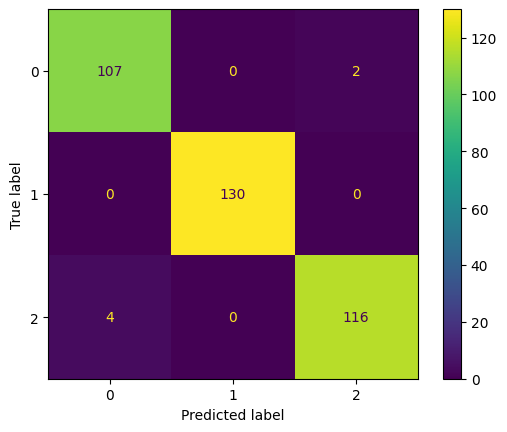

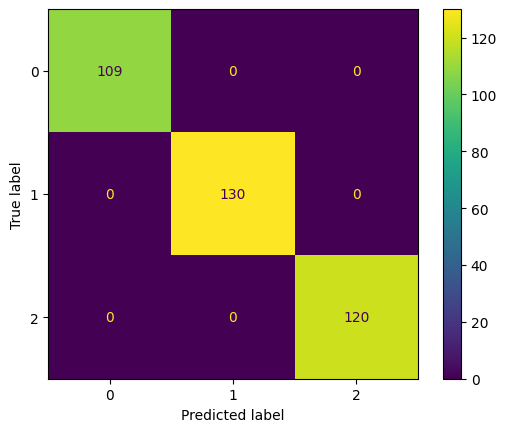

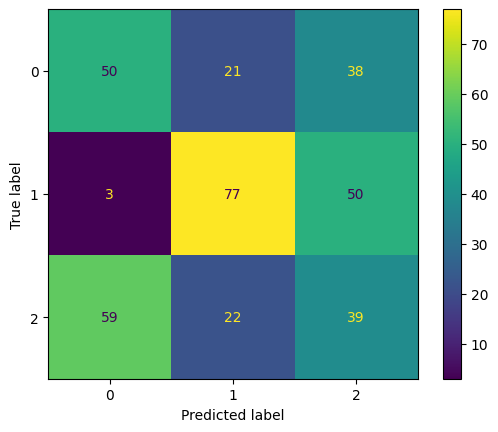

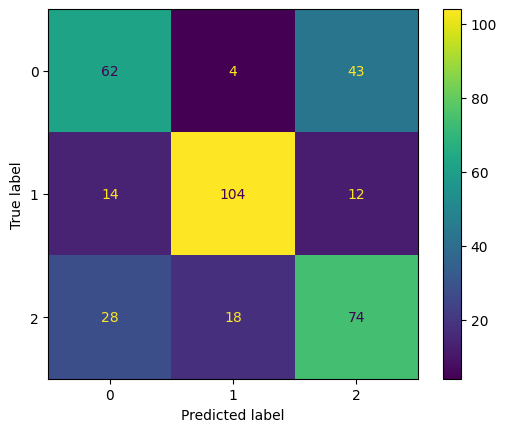

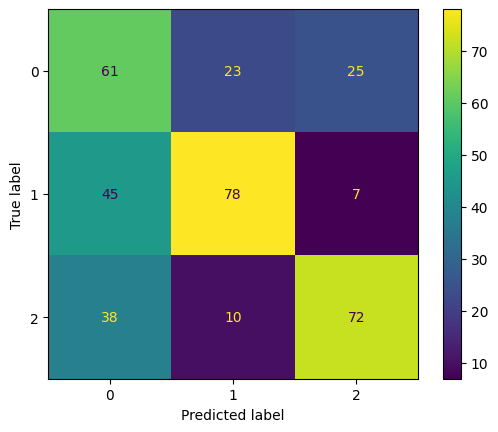

In [86]:
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds) * 100
    
    print(f"\n🧪 Model: {name}")
    print(f"✅ Accuracy: {acc:.2f}%")   

    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()